# Feature maps

In [1]:
from chapter import *
model.load_state_dict(torch.load("./artifacts/mnist_model.pkl"))

<All keys matched successfully>

Showing intermediate activations during training (i.e. dropout = ON). Recall that feature map in the input of a convolutional layer is used to create each output feature map. Max-pooling and SELU on the other hand acts on each feature map independently. Note that fully-connected layer outputs are reshaped to two dimensions for the sake of presentation.

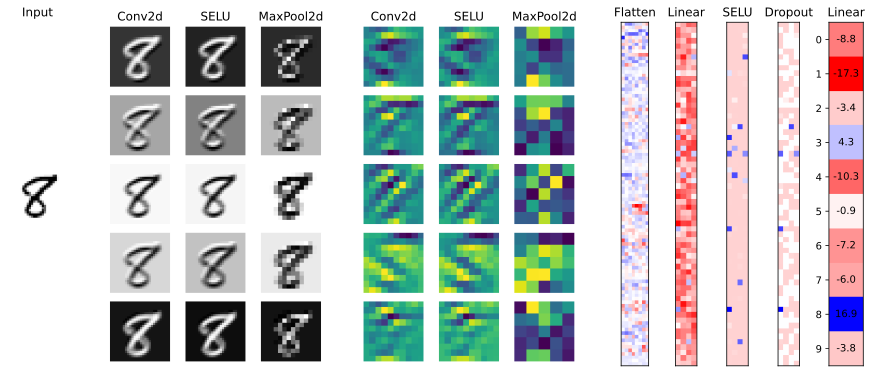

In [2]:
from matplotlib.colors import LinearSegmentedColormap

x, y = next(iter(dl_valid))
b = torch.argmax((y == 8).type(torch.int64))
x = x[b:b+1, :].to(DEVICE) # first element

width_ratios = [1, 0.2, 1, 1, 1, 0.2, 1, 1, 1, 0.2, 0.6, 0.6, 0.6, 0.6, 0.8]
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
spec = fig.add_gridspec(5, len(width_ratios), width_ratios=width_ratios)
cmap = LinearSegmentedColormap.from_list("custom", ["red", "white", "blue"])

# Input image
input_layer = []
for i in range(5):
    input_layer.append(fig.add_subplot(spec[i, 0]))
    input_layer[i].set_axis_off()

input_layer[2].imshow(x[0, 0].cpu().detach().numpy(), cmap="Greys")
input_layer[0].set_title("Input")

# Block 1
for k in range(3):
    x = model[k](x)
    layer = []
    for i in range(5):
        layer.append(fig.add_subplot(spec[i, k + 2]))
        layer[i].set_axis_off()
        layer[i].imshow(x[0, i+10].cpu().detach().numpy(), cmap="Greys")
        layer[i].axis("off")
    layer[0].set_title(type(model[k]).__name__)

# Block 2
for k in range(3):
    x = model[3 + k](x)
    layer = []
    for i in range(5):
        layer.append(fig.add_subplot(spec[i, k + 6]))
        layer[i].set_axis_off()
        layer[i].imshow(x[0, i].cpu().detach().numpy())
        layer[i].axis("off")
    layer[0].set_title(type(model[k]).__name__)

# Classification subnetwork
for l in range(5):
    x = model[6 + l](x)
    if l == 0:
        data = x[0].cpu().detach().view(-1, 8).numpy()
    elif l < 4:
        data = x[0].cpu().detach().view(-1, 4).numpy()
    else:
        data = x[0].cpu().detach().view(-1, 1).numpy()

    a = np.abs(data).max()
    ax = fig.add_subplot(spec[:, 10 + l])
    ax.imshow(data, cmap=cmap, vmin=-a, vmax=a)
    ax.xaxis.set_visible(False)
    ax.set_title(type(model[6 + l]).__name__)
    ax.tick_params(axis="y", colors="white")


# For last layer annotate value
for i in range(10):
    ax.tick_params(axis="y", colors="black")
    ax.set_yticks(range(10))
    ax.text(0, i, f"{data[i, 0]:.1f}", ha="center", va="center", color="black")
    
fig.tight_layout(pad=0.00)

Model predict probability (increase [temperature](https://stats.stackexchange.com/a/527082) to make the distribution look more random):

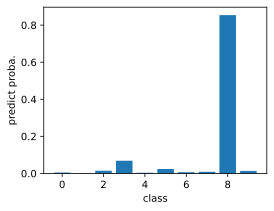

In [3]:
temp = 5.0
plt.figure(figsize=(4, 3))
plt.bar(range(10), F.softmax(x / temp, dim=1).detach().cpu()[0])
plt.xlabel("class")
plt.ylabel("predict proba.");